In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_prd_temperature_data(base_path):
    data = {}
    prod_root = os.path.join(base_path, 'Production')

    for scenario in os.listdir(prod_root):
        scenario_path = os.path.join(prod_root, scenario)
        if not os.path.isdir(scenario_path):
            continue

        # break off q and WR
        parts = [p.strip() for p in scenario.split(',')]
        q_value  = parts[0]                   # 'q=0' or 'q=3.1e-07'
        well_rate = parts[1] if len(parts)>1 else ''  # 'WR=8000'

        for model_dir in os.listdir(scenario_path):
            model_path = os.path.join(scenario_path, model_dir)
            if not os.path.isdir(model_path):
                continue

            mp = [p.strip() for p in model_dir.split(',')]
            model_name = mp[0]                # 'homogeneous' or 'model 0'
            q_key = q_value
            if len(mp)>1:
                q_key += f', {mp[1]}'         # add 'dir=…' if present

            fname = os.path.join(model_path, 'time_data.xlsx')
            df = pd.read_excel(fname, usecols=['time','PRD : temperature (K)'])
            data.setdefault(model_name, {})[(q_key, well_rate)] = df

    return data


def plot_prd_temperature(data, model_name, well_rate):
    # grab only the series for this WR
    dd = data.get(model_name, {})
    series = {q:df for (q, wr), df in dd.items() if wr == well_rate}

    fig, ax = plt.subplots(figsize=(12,5))
    for q_key in sorted(series, key=legend_sort_key):
        df = series[q_key]
        ax.plot(df['time']/365, df['PRD : temperature (K)'], label=q_key)

    ax.set_xlabel('Time (years)')
    ax.set_ylabel('PRD : temperature (K)')
    ax.set_title(f"PRD: Temperature vs Time for {model_name}, {well_rate}")
    ax.legend(title='Background flowrate, direction',
              bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.tight_layout()
    fig.subplots_adjust(right=0.75)
    plt.show()


def plot_prd_temp_difference(data, model_name, well_rate):
    dd = data.get(model_name, {})
    # filter to this WR
    series = {q:df for (q, wr), df in dd.items() if wr == well_rate}

    df0 = series.get('q=0')
    if df0 is None:
        raise KeyError(f"No q=0 series for {model_name} at {well_rate}")

    t0 = df0['time'].values
    T0 = df0['PRD : temperature (K)'].values

    fig, ax = plt.subplots(figsize=(12,5))
    for q_key in sorted(series, key=legend_sort_key):
        if q_key == 'q=0':
            continue
        df = series[q_key]
        t = df['time'].values
        T = df['PRD : temperature (K)'].values

        # interpolate
        T0i = np.interp(t, t0, T0)
        delta = T - T0i

        ax.plot(t/365, delta, label=q_key)

    ax.set_xlabel('Time (years)')
    ax.set_ylabel(r'$\Delta T$ (K) relative to q=0')
    ax.set_title(f'PRD Temperature Difference for {model_name}, {well_rate}')
    ax.legend(title='Background flowrate, direction',
              bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.tight_layout()
    fig.subplots_adjust(right=0.75)
    plt.show()


def legend_sort_key(q_key):
    if q_key.startswith("q=0"):
        return (0, 0)
    if "dir=" in q_key:
        angle_part = q_key.split("dir=", 1)[1]
        angle_str = angle_part.split()[0].rstrip(",")
        return (1, int(angle_str))
    return (1, -1)

In [13]:
data = load_prd_temperature_data('output')

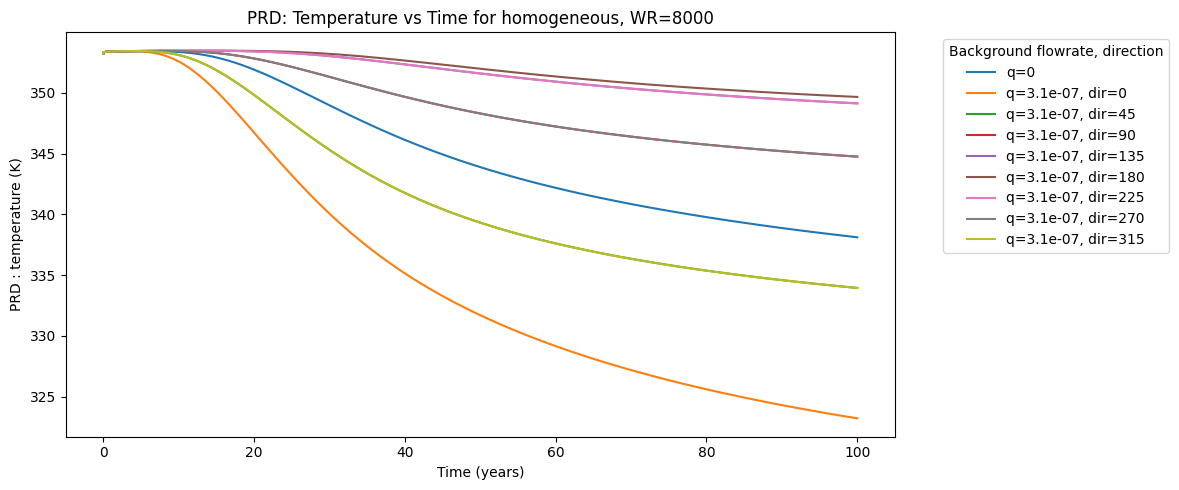

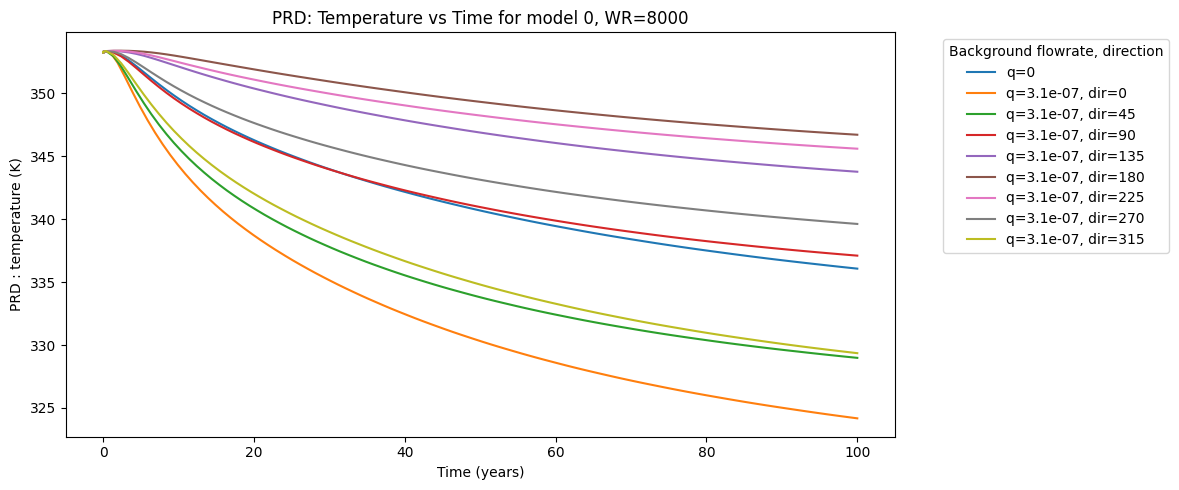

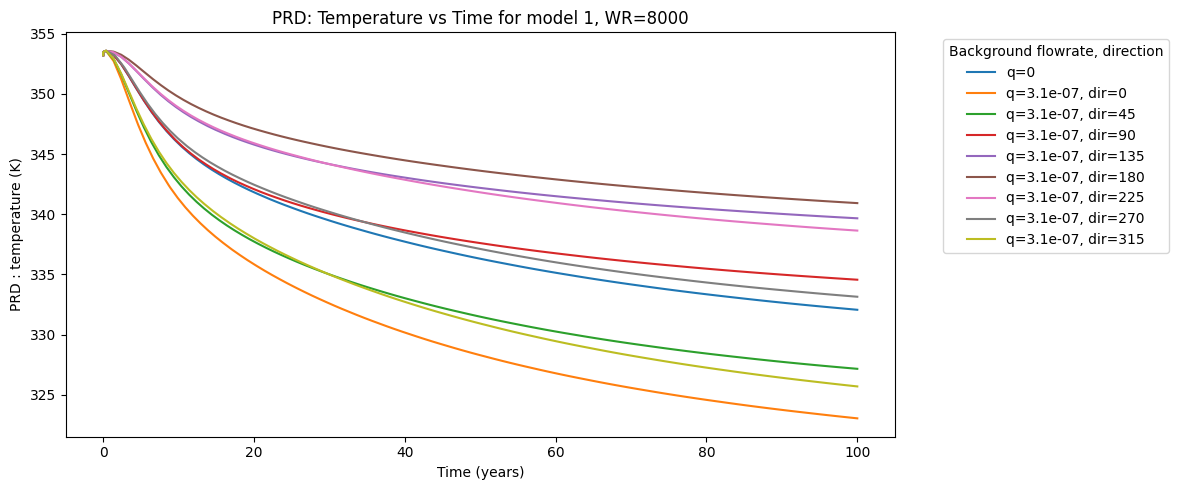

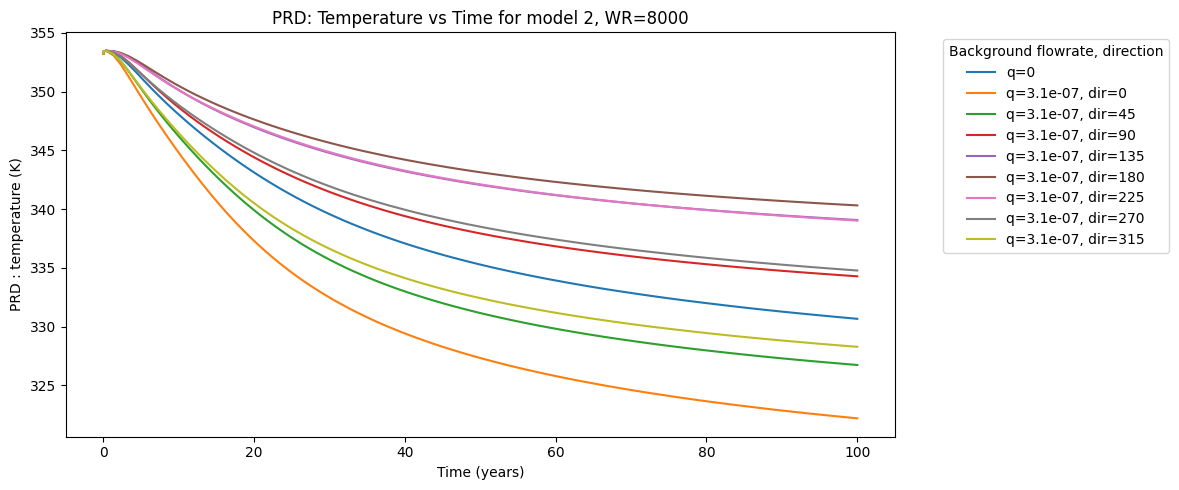

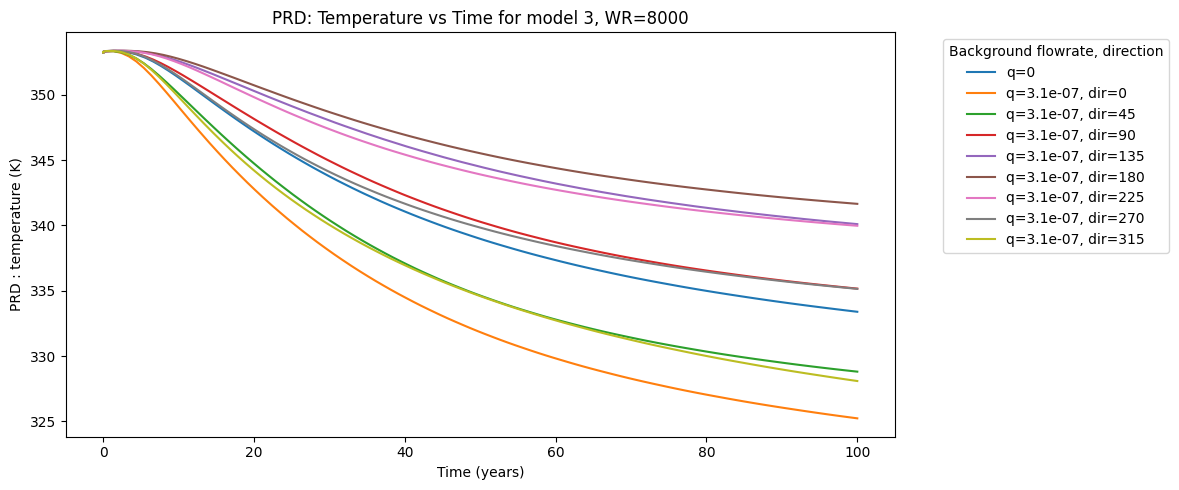

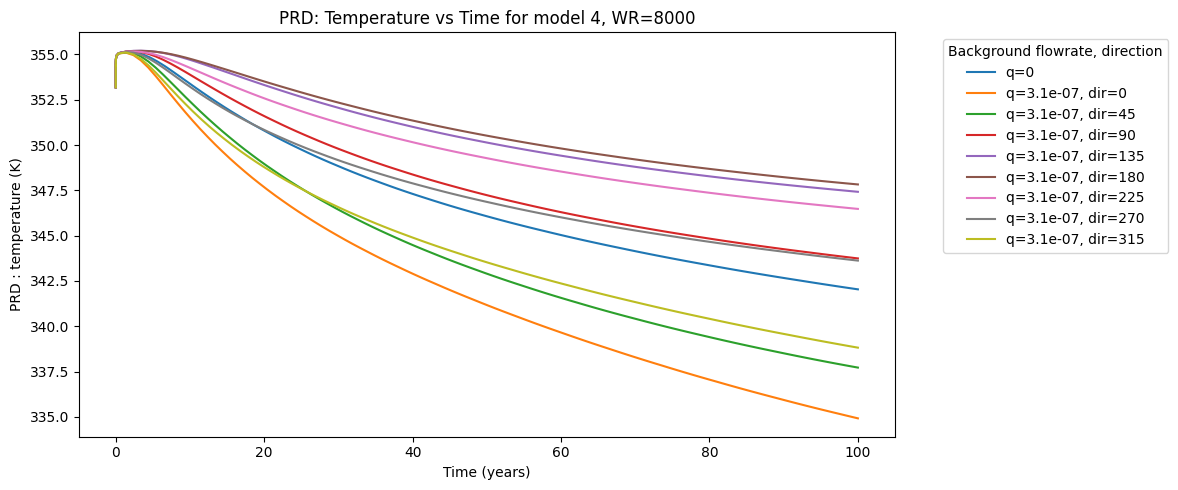

In [17]:
plot_prd_temperature(data, 'homogeneous', 'WR=8000')
plot_prd_temperature(data, 'model 0', 'WR=8000')
plot_prd_temperature(data, 'model 1', 'WR=8000')
plot_prd_temperature(data, 'model 2', 'WR=8000')
plot_prd_temperature(data, 'model 3', 'WR=8000')
plot_prd_temperature(data, 'model 4', 'WR=8000')

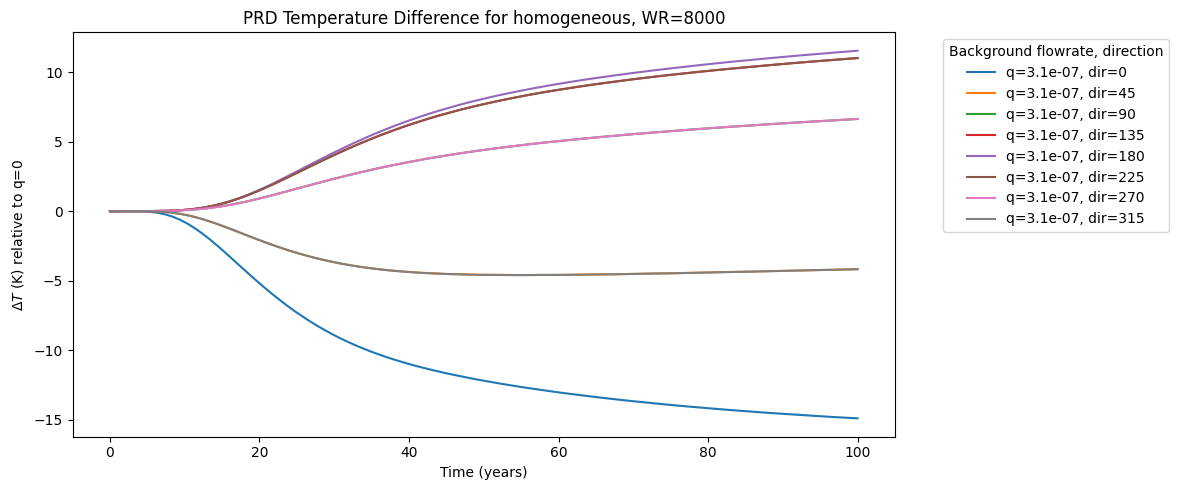

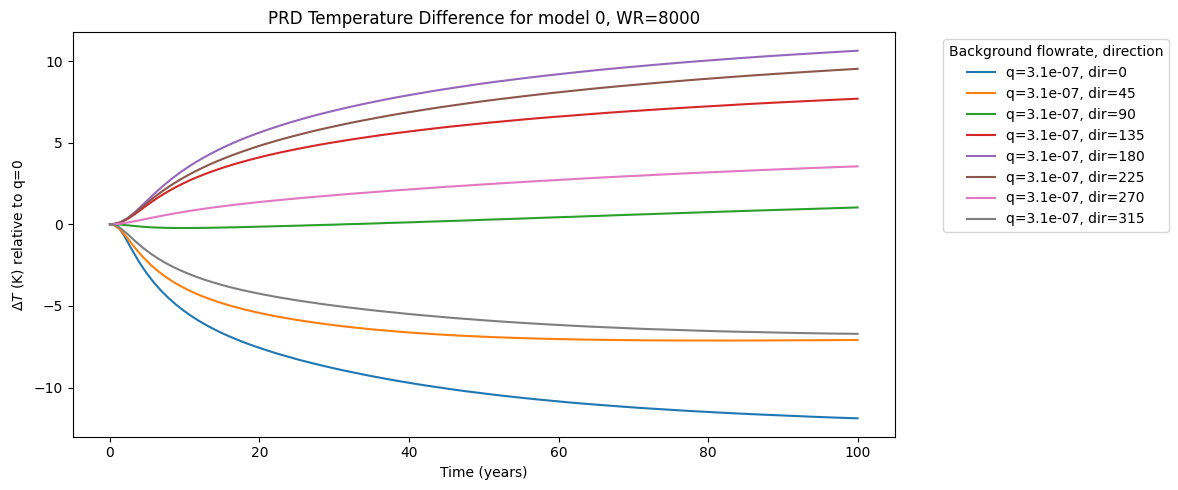

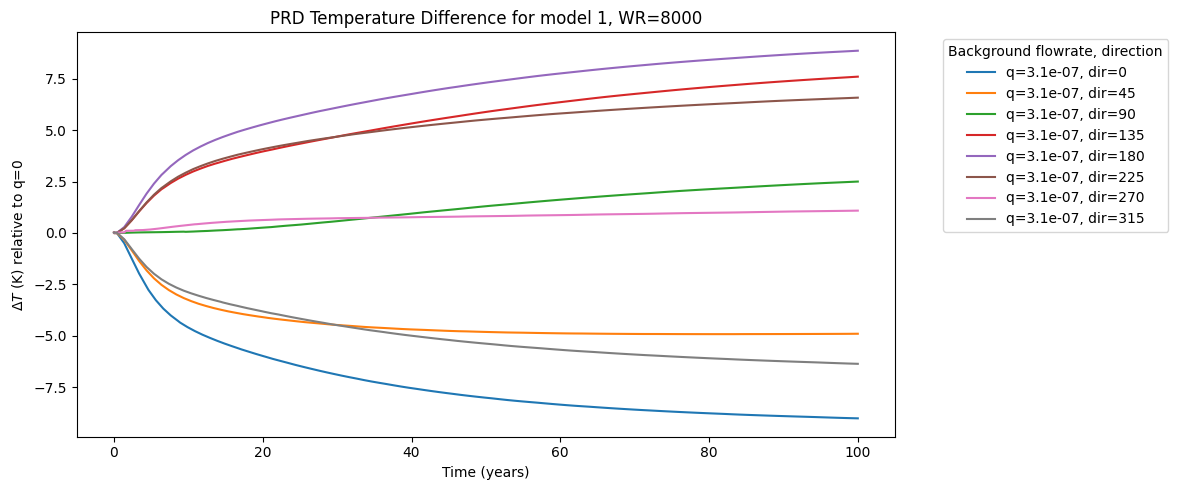

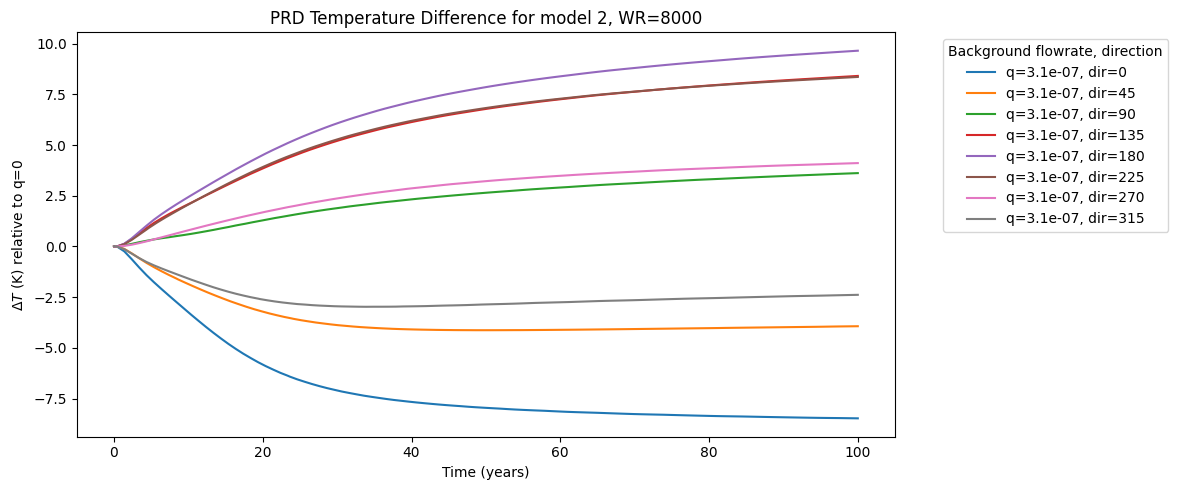

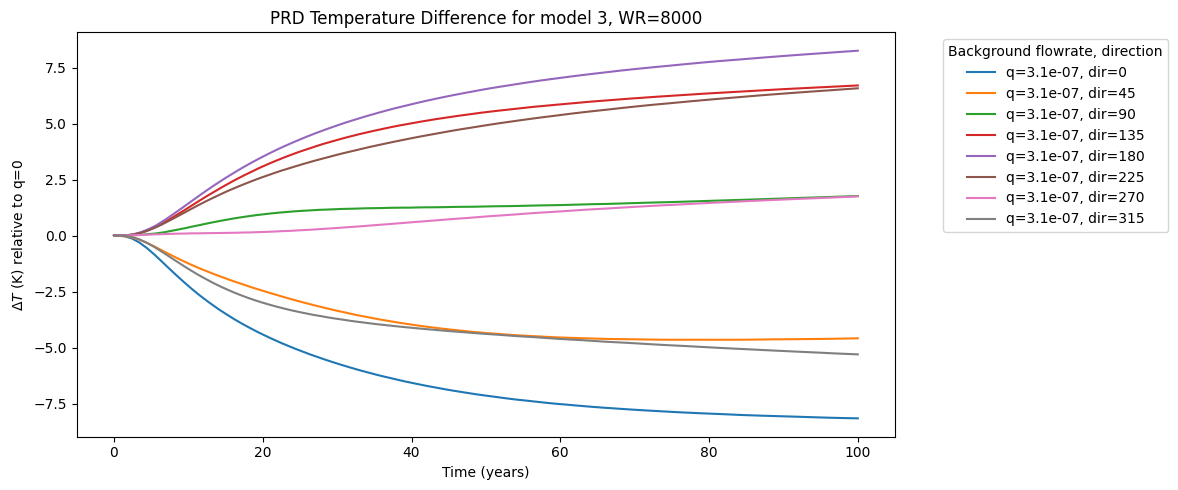

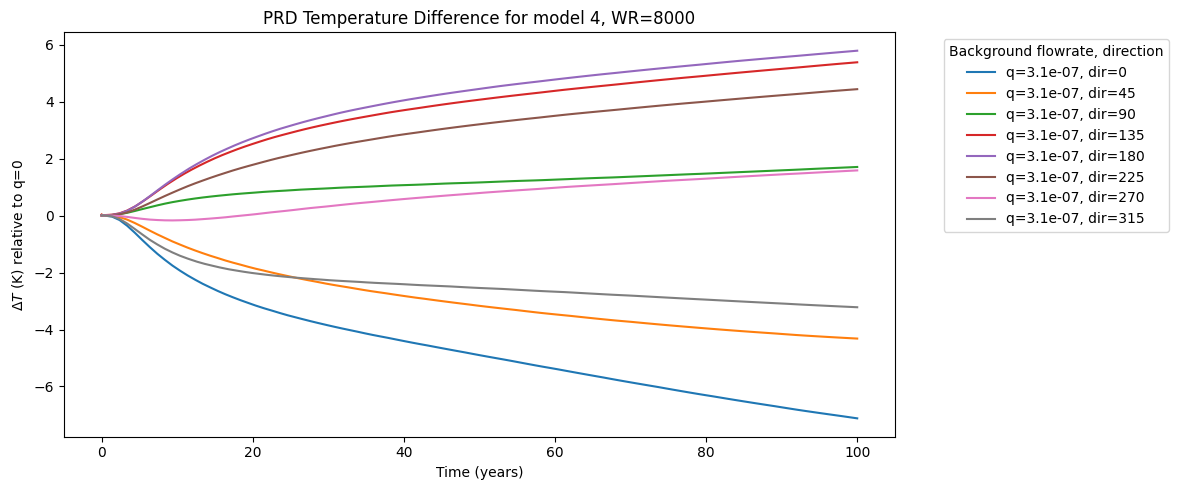

In [18]:
plot_prd_temp_difference(data, 'homogeneous', 'WR=8000')
plot_prd_temp_difference(data, 'model 0', 'WR=8000')
plot_prd_temp_difference(data, 'model 1', 'WR=8000')
plot_prd_temp_difference(data, 'model 2', 'WR=8000')
plot_prd_temp_difference(data, 'model 3', 'WR=8000')
plot_prd_temp_difference(data, 'model 4', 'WR=8000')